In [1]:
import pandas as pd
import numpy as np
from os.path import basename
from glob import glob
import h5py
import scipy.stats as ss

import matplotlib.pyplot as plt
from plotnine import *
from IPython.display import display, Markdown

import sys
sys.path.insert(0, '../CODE/')
from importlib import reload
import visualization_utils
reload(visualization_utils)
from visualization_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
def resp_ratio(x):
    return sum(x == 1) / len(x)

# Human K562 10-fold-cv performance

In [3]:
out_dir = '../OUTPUT/human_42tfs_k562_hp_tun/'

pred_df = pd.read_csv(out_dir + 'preds.csv.gz')
rr_df = pred_df.groupby('tf')['label'].agg(resp_ratio).reset_index()

In [4]:
stats_df = pd.read_csv(out_dir + 'stats.csv.gz')
stats_df = stats_df.merge(rr_df, on='tf')

stats_df

,cv,tf,auroc,auprc,label
0,0,ENSG00000111206,0.862500,0.485296,0.122875
1,0,ENSG00000115816,0.686642,0.014438,0.007445
2,0,ENSG00000130254,0.775994,0.012873,0.004858
3,0,ENSG00000144161,0.700916,0.176413,0.094572
4,0,ENSG00000158773,0.820708,0.029740,0.006706
5,1,ENSG00000113658,0.868011,0.628737,0.210318
6,1,ENSG00000125952,NaN,NaN,0.000000
7,1,ENSG00000131931,0.875294,0.608320,0.217130
8,1,ENSG00000156273,0.905308,0.020555,0.001690
9,1,ENSG00000198176,0.872505,0.600689,0.179850


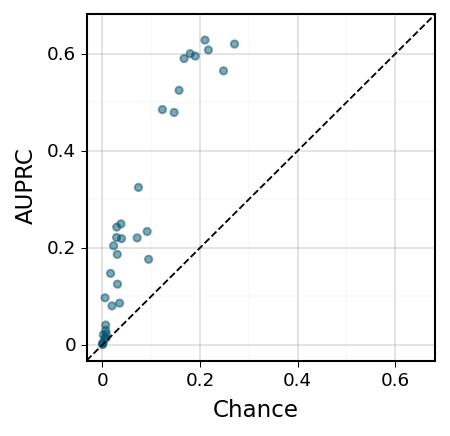

<ggplot: (2998025341886)>

In [5]:
(
    ggplot(stats_df, aes(x='label', y='auprc'))
    + geom_point(color=COLORS['dark_blue'], alpha=.5)
    + geom_abline(slope=1, intercept=0, linetype='dashed')
    + lims(x=[0, .65], y=[0, .65])
    + labs(x='Chance', y='AUPRC')
    + theme_linedraw()
    + theme(figure_size=(3, 3), dpi=150)
)

# SHAP

In [6]:
organism = 'human_k562'
k562_dir = '../OUTPUT/human_42tfs_k562_hp_tun/'
k562_tfs = np.loadtxt('../../Pert_Response_Modeling/RESOURCES/TF_list/Human_ENCODE_K562_TFs.txt', dtype=str, usecols=[0])

k562_sss_df = pd.DataFrame()

for i, tf_chunk in enumerate(np.array_split(k562_tfs, 4)):
    print('Working on TF chunk {}, n={}'.format(i, len(tf_chunk)))
    
    k562_sss_subdf = calculate_resp_and_unresp_signed_shap_sum(k562_dir, organism=organism, tfs=tf_chunk)
    k562_sss_df = k562_sss_df.append(k562_sss_subdf)

k562_sss_df.to_csv(k562_dir + '/signed_shap_sum.csv.gz')

Working on TF chunk 0, n=14
Loading feature data ... 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Parsing signed shap values ...
Summing shap ...
Working on TF chunk 1, n=14
Loading feature data ... 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Parsing signed shap values ...
Summing shap ...
Working on TF chunk 2, n=13
Loading feature data ... 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Parsing signed shap values ...
Summing shap ...
Working on TF chunk 3, n=13
Loading feature data ... 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Parsing signed shap values ...
Summing shap ...


In [7]:
# k562_sss_df = pd.read_csv(k562_dir + '/signed_shap_sum.csv.gz')

k562_sss_df = k562_sss_df.merge(stats_df[['tf', 'auprc']], on='tf', how='left')
k562_sss_df = calculate_shap_net_influence(k562_sss_df)

All TFs (n=37)


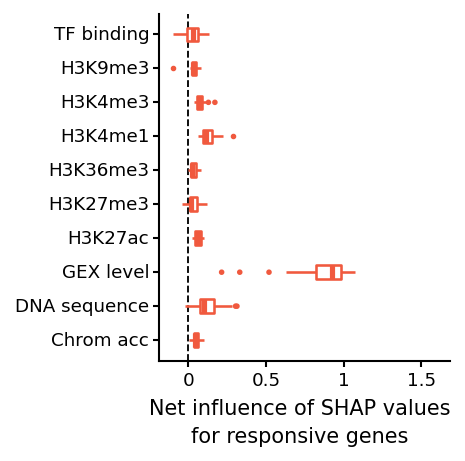

<ggplot: (2998026981233)>

In [8]:
# Plot all models
plot_df = k562_sss_df[(k562_sss_df['label_name'] == 'Responsive')]
print('All TFs (n={})'.format(len(plot_df['tf'].unique())))

ax = (
    ggplot(plot_df, aes(x='feat_type_name', y='shap_diff'))
    + geom_hline(yintercept=0, linetype='dashed')
    + geom_boxplot(outlier_size=.5, size=.7, width=.4, color=COLORS['orange'])
#     + geom_jitter(height=0, width=.2, alpha=.2, color='blue')
    + coord_flip()
    + ylim(-.1, 1.6)
    + labs(x=None, y='Net influence of SHAP values\nfor responsive genes')
    + theme_classic()
    + theme(
        figure_size=(2.5, 3), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)

TFs w/ AUPRC > 0.1 (n=25)


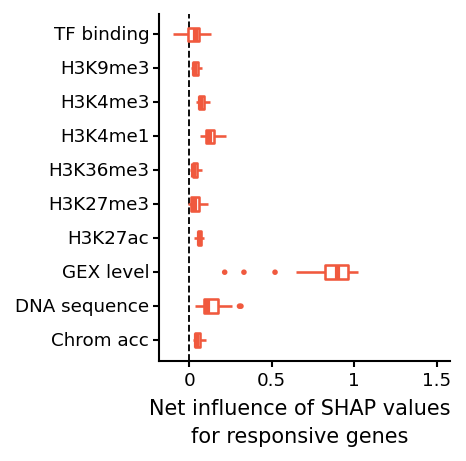

<ggplot: (2998413467726)>

In [9]:
# Plot all models
plot_df = k562_sss_df[(k562_sss_df['auprc'] > 0.1) & (k562_sss_df['label_name'] == 'Responsive')]
print('TFs w/ AUPRC > 0.1 (n={})'.format(len(plot_df['tf'].unique())))

ax = (
    ggplot(plot_df, aes(x='feat_type_name', y='shap_diff'))
    + geom_hline(yintercept=0, linetype='dashed')
    + geom_boxplot(outlier_size=.5, size=.7, width=.4, color=COLORS['orange'])
#     + geom_jitter(height=0, width=.2, alpha=.2, color='blue')
    + coord_flip()
    + ylim(-.1, 1.5)
    + labs(x=None, y='Net influence of SHAP values\nfor responsive genes')
    + theme_classic()
    + theme(
        figure_size=(2.5, 3), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)